# Chatbot Statistical NLP

<h3> About the DataSet: </h3> 
Dataset : <a href='https://github.com/Jayabharathi-Hari-Vijayakumar/UTAustin_PGP_Datasets/blob/main/Chatbot%20Corpus/GL%20Bot.json'>GL Bot.json Corpus
</a> .




• **DOMAIN**: Customer support

• **CONTEXT**: Great Learning has a an academic support department which receives numerous support requests every day throughout the year.
Teams are spread across geographies and try to provide support round the year. Sometimes there are circumstances where due to heavy
workload certain request resolutions are delayed, impacting company’s business. Some of the requests are very generic where a proper
resolution procedure delivered to the user can solve the problem. Company is looking forward to design an automation which can interact with
the user, understand the problem and display the resolution procedure [ if found as a generic request ] or redirect the request to an actual human
support executive if the request is complex or not in it’s database.

In [ ]:
#importing the libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import json
import nltk
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Input,Embedding, LSTM, Dense, GlobalMaxPooling1D, Flatten
import matplotlib.pyplot as plt

In [ ]:
%%writefile content.json
{"intents": [
        {"tag": "Intro",
         "patterns": ["hi",
                      "how are you",
                      "is anyone there",
                      "hello",
                      "whats up",
                      "hey",
                      "yo",
                      "listen",
                      "please help me",
                      "i am learner from",
                      "i belong to",
                      "aiml batch",
                      "aifl batch",
                      "i am from",
                      "my pm is",
                      "blended",
                      "online",
                      "i am from",
                      "hey ya",
                      "talking to you for first time"],
         "responses": ["Hello! how can i help you ?"],
         "context_set": ""
        },
        {"tag": "Exit",
         "patterns": ["thank you",
                      "thanks",
                      "cya",
                      "Bye",
                      "see you",
                      "later",
                      "see you later",
                      "goodbye",
                      "i am leaving",
                      "have a Good day",
                      "you helped me",
                      "thanks a lot",
                      "thanks a ton",
                      "you are the best",
                      "great help",
                      "too good",
                      "you are a good learning buddy"],
         "responses": ["I hope I was able to assist you, Good Bye"],
         "context_set": ""
        },
        {"tag": "Olympus",
         "patterns": ["olympus",
                      "explain me how olympus works",
                      "I am not able to understand olympus",
                      "olympus window not working",
                      "no access to olympus",
                      "unable to see link in olympus",
                      "no link visible on olympus",
                      "whom to contact for olympus",
                      "lot of problem with olympus",
                      "olypus is not a good tool",
                      "lot of problems with olympus",
                      "how to use olympus",
                      "teach me olympus"],
         "responses": ["Link: Olympus wiki"],
         "context_set": ""
        },
        {"tag": "SL",
         "patterns": ["i am not able to understand svm",
                      "explain me how machine learning works",
                      "i am not able to understand naive bayes",
                      "i am not able to understand logistic regression",
                      "i am not able to understand ensemble techb=niques",
                      "i am not able to understand knn",
                      "i am not able to understand knn imputer",
                      "i am not able to understand cross validation",
                      "i am not able to understand boosting",
                      "i am not able to understand random forest",
                      "i am not able to understand ada boosting",
                      "i am not able to understand gradient boosting",
                      "machine learning",
                      "ML",
                      "SL",
                      "supervised learning",
                      "knn",
                      "logistic regression",
                      "regression",
                      "classification",
                      "naive bayes",
                      "nb",
                      "ensemble techniques",
                      "bagging",
                      "boosting",
                      "ada boosting",
                      "ada",
                      "gradient boosting",
                      "hyper parameters"],
         "responses": ["Link: Machine Learning wiki "],
         "context_set": ""
        },

        {"tag": "NN",
         "patterns": ["what is deep learning",
                      "unable to understand deep learning",
                      "explain me how deep learning works",
                      "i am not able to understand deep learning",
                      "not able to understand neural nets",
                      "very diffult to understand neural nets",
                      "unable to understand neural nets",
                      "ann",
                      "artificial intelligence",
                      "artificial neural networks",
                      "weights",
                      "activation function",
                      "hidden layers",
                      "softmax",
                      "sigmoid",
                      "relu",
                      "otimizer",
                      "forward propagation",
                      "backward propagation",
                      "epochs",
                      "epoch",
                      "what is an epoch",
                      "adam",
                      "sgd"],
         "responses": ["Link: Neural Nets wiki"],
         "context_set": ""
        },

        {"tag": "Bot",
         "patterns": ["what is your name",
                      "who are you",
                      "name please",
                      "when are your hours of opertions",
                      "what are your working hours",
                      "hours of operation",
                      "working hours",
                      "hours"],
         "responses": ["I am your virtual learning assistant"],
         "context_set": ""
        },

    {"tag": "Profane",
         "patterns": ["what the hell",
                      "bloody stupid bot",
                      "do you think you are very smart",
                      "screw you",
                      "i hate you",
                      "you are stupid",
                      "jerk",
                      "you are a joke",
                      "useless piece of shit"],
         "responses": ["Please use respectful words"],
         "context_set": ""
        },

        {"tag": "Ticket",
         "patterns": ["my problem is not solved",
                      "you did not help me",
                      "not a good solution",
                      "bad solution",
                      "not good solution",
                      "no help",
                      "wasted my time",
                      "useless bot",
                      "create a ticket"],
         "responses": ["Tarnsferring the request to your PM"],
         "context_set": ""
        }
   ]
}

Writing content.json


In [ ]:
#importing the dataset
with open('content.json') as content:
    Data_Collection =json.load(content)

In [ ]:
#Printing the dataset
Data_Collection

{'intents': [{'tag': 'Intro',
   'patterns': ['hi',
    'how are you',
    'is anyone there',
    'hello',
    'whats up',
    'hey',
    'yo',
    'listen',
    'please help me',
    'i am learner from',
    'i belong to',
    'aiml batch',
    'aifl batch',
    'i am from',
    'my pm is',
    'blended',
    'online',
    'i am from',
    'hey ya',
    'talking to you for first time'],
   'responses': ['Hello! how can i help you ?'],
   'context_set': ''},
  {'tag': 'Exit',
   'patterns': ['thank you',
    'thanks',
    'cya',
    'Bye',
    'see you',
    'later',
    'see you later',
    'goodbye',
    'i am leaving',
    'have a Good day',
    'you helped me',
    'thanks a lot',
    'thanks a ton',
    'you are the best',
    'great help',
    'too good',
    'you are a good learning buddy'],
   'responses': ['I hope I was able to assist you, Good Bye'],
   'context_set': ''},
  {'tag': 'Olympus',
   'patterns': ['olympus',
    'explain me how olympus works',
    'I am not able t

In [ ]:
#getting all the data to lists
# tags = []
# inputs = []
# responses={}
# for intent in data1['intents']:
#     responses[intent['tag']]=intent['responses']
# for lines in intent['patterns']:
#      inputs.append(lines)
#      tags.append(intent['tag'])

tags = []
inputs = []
responses = {}

for intent in Data_Collection['intents']:
    tag = intent['tag']
    responses[tag] = intent['responses']

    for line in intent['patterns']:
        inputs.append(line)
        tags.append(tag)

In [ ]:
#converting to dataframe
Chatbot_Data = pd.DataFrame({"inputs":inputs,
                     "tags":tags})

In [ ]:
#printing data
Chatbot_Data

,inputs,tags
0,hi,Intro
1,how are you,Intro
2,is anyone there,Intro
3,hello,Intro
4,whats up,Intro
...,...,...
124,not good solution,Ticket
125,no help,Ticket
126,wasted my time,Ticket
127,useless bot,Ticket


In [ ]:
Chatbot_Data.shape

(129, 2)

In [ ]:
Chatbot_Data= Chatbot_Data.sample(frac=1)
#Setting frac=1 means you are sampling the entire DataFrame, effectively shuffling all its rows. This is a common technique to shuffle the order of rows in a DataFrame.


Pre-processing is a crucial step that involves tasks such as eliminating punctuation, converting text to lowercase, and encoding textual data into numerical representations.

In [ ]:
#Removinng Punctuations
import string
Chatbot_Data['inputs'] = data['inputs'].apply(lambda  wrd:[ltrs.lower() for ltrs in wrd if ltrs not in string.punctuation])
Chatbot_Data['inputs'] = data['inputs'].apply(lambda  wrd: ''.join(wrd))
Chatbot_Data

,inputs,tags
87,artificial intelligence,NN
89,weights,NN
13,i am from,Intro
28,i am leaving,Exit
64,SL,SL
...,...,...
39,I am not able to understand olympus,Olympus
12,aifl batch,Intro
30,you helped me,Exit
127,useless bot,Ticket


In [ ]:
#takenize  the data
from tensorflow.keras.preprocessing.text  import Tokenizer
tokenizer = Tokenizer(num_words = 2000)
tokenizer.fit_on_texts(Chatbot_Data['inputs'])
train = tokenizer.texts_to_sequences(Chatbot_Data['inputs'])
#appply  padding
from tensorflow.keras.preprocessing.sequence import pad_sequences
x_train = pad_sequences(train)

#encoding the outputs
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(Chatbot_Data['tags'])


Utilizing TensorFlow's Tokenizer facilitates the conversion of textual data into sequences of integers, a crucial preprocessing step for natural language processing tasks. Following this, the application of pad_sequences becomes essential to standardize the sequence lengths, ensuring uniform input dimensions, which is particularly significant when feeding data into neural networks.

To complement the text preprocessing, scikit-learn's LabelEncoder is employed to encode the output labels or tags. This process transforms textual labels into numerical representations, enabling their utilization in machine learning models for efficient training and prediction.

In [ ]:
input_shape = x_train.shape[1]
print(input_shape)
#So, input_shape will be equal to the length of the longest sequence in your x_train

9


In [ ]:
#define vocabulary
vocabulary = len(tokenizer.word_index)
print("total no. of unique words: ", vocabulary)
output_length = le.classes_.shape[0]
print("output length: ", output_length)

total no. of unique words:  162
output length:  8


# **Neural  Network**


In [ ]:
from tensorflow.keras.layers import Input, Embedding, LSTM, Flatten, Dense
from tensorflow.keras.models import Model  # Import Model from tensorflow.keras.models

from re import X
#creating the moddel

i = Input(shape=(input_shape,))
x = Embedding(vocabulary+1,10)(i)
x = LSTM(10,return_sequences=True)(x)
x = Flatten()(x)
x = Dense(output_length,activation="softmax")(x)
model = Model(i,x)

In [ ]:
#compiling the model
model.compile(loss="sparse_categorical_crossentropy", optimizer='adam',metrics=['accuracy'])

In [ ]:
#training the model
train = model.fit(x_train,y_train,epochs=200)

Epoch 1/200
5/5 [==============================] - 4s 11ms/step - loss: 2.0796 - accuracy: 0.0853
Epoch 2/200
5/5 [==============================] - 0s 6ms/step - loss: 2.0739 - accuracy: 0.2326
Epoch 3/200
5/5 [==============================] - 0s 8ms/step - loss: 2.0692 - accuracy: 0.2403
Epoch 4/200
5/5 [==============================] - 0s 7ms/step - loss: 2.0644 - accuracy: 0.2248
Epoch 5/200
5/5 [==============================] - 0s 7ms/step - loss: 2.0585 - accuracy: 0.2248
Epoch 6/200
5/5 [==============================] - 0s 8ms/step - loss: 2.0521 - accuracy: 0.2248
Epoch 7/200
5/5 [==============================] - 0s 7ms/step - loss: 2.0456 - accuracy: 0.2248
Epoch 8/200
5/5 [==============================] - 0s 7ms/step - loss: 2.0378 - accuracy: 0.2248
Epoch 9/200
5/5 [==============================] - 0s 8ms/step - loss: 2.0288 - accuracy: 0.2248
Epoch 10/200
5/5 [==============================] - 0s 6ms/step - loss: 2.0185 - accuracy: 0.2248
Epoch 11/200
5/5 [==========

# Model Analysis

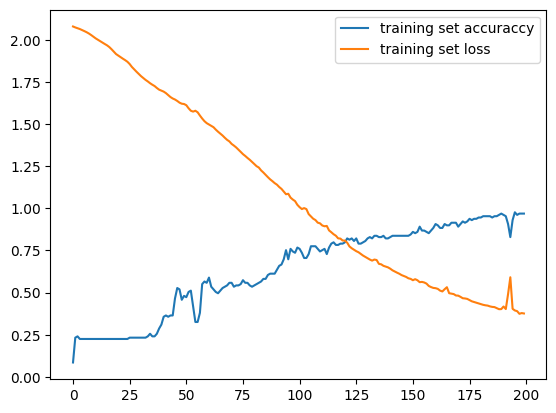

In [ ]:
#plotting model accuracg
plt.plot(train.history['accuracy'],label='training set accuraccy')
plt.plot(train.history['loss'],label='training set loss')
plt.legend()

In [ ]:
#Chatting
import random

while True:
    texts_p = []
    prediction_input = input('You : ')

    #removing punctuation and converting to lowercase
    prediction_input = [letters.lower() for letters in prediction_input if letters not in string.punctuation]
    prediction_input = ''.join(prediction_input)
    texts_p.append(prediction_input)

    #tokenizing and padding
    prediction_input = tokenizer.texts_to_sequences(texts_p)
    prediction_input = np.array(prediction_input).reshape(-1)
    prediction_input = pad_sequences([prediction_input],input_shape)

    #getting output from model
    output = model.predict(prediction_input)
    output = output.argmax()

    #finding the right tag and predicting
    response_tag =  le.inverse_transform([output])[0]
    print("GL Bot : ",random.choice(responses[response_tag]))
    if response_tag == "Exit":
        break


You : hey
1/1 [==============================] - 1s 638ms/step
GL Bot :  Hello! how can i help you ?
You : what is your name
1/1 [==============================] - 0s 22ms/step
GL Bot :  I am your virtual learning assistant
You : what is deep learning
1/1 [==============================] - 0s 37ms/step
GL Bot :  Link: Neural Nets wiki
You : useless bot
1/1 [==============================] - 0s 22ms/step
GL Bot :  Tarnsferring the request to your PM
You : what the hell
1/1 [==============================] - 0s 33ms/step
GL Bot :  Please use respectful words
You : bye
1/1 [==============================] - 0s 22ms/step
GL Bot :  I hope I was able to assist you, Good Bye


JB